# **Работа с датасетом**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/data_lab_1.csv')
data

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.70,16.0,51.0,8,False,25.00,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,NaN,11.0,18.6,1,False,11.00,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.00,2,NaN,5.0,34.3,4,False,8.30,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.00,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.00,2,3.03,14.0,32.0,13,False,41.00,NaN,31856.0,8098.0,112.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,3.70,5.0,73.3,3,False,13.83,NaN,24665.0,4232.0,796.0,381.0
23695,3100000.0,59.00,3,NaN,5.0,38.0,4,False,8.50,NaN,NaN,NaN,NaN,NaN
23696,2500000.0,56.70,2,NaN,3.0,29.7,1,False,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,76.75,2,3.00,17.0,NaN,12,False,23.30,2.0,39140.0,10364.0,173.0,196.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


In [ ]:
data.isna().sum()

,0
price,0
total_area,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
studio,0
kitchen_area,2278
balcony,11519


**Обработка пропусков**

In [ ]:
#заполним 0 пропуски в колонке "Balcony" тк скорее отствие значения=отсутвие балкона
data['balcony'] = data['balcony'].fillna(0)

#пропуски колонки "floors_total" выкинем тк пропусков меньше 5%
data = data.dropna(subset=['floors_total'])

#остальные пропуски заполним медианой, тк это числовые пропуски и кол-во пропусков >5%
for col in ['living_area', 'kitchen_area',
            'ceiling_height', 'airports_distance',
            'centers_distance', 'parks_nearest', 'ponds_nearest']:
    data.loc[:, col] = data[col].fillna(data[col].median())


data.isna().sum()

,0
price,0
total_area,0
rooms,0
ceiling_height,0
floors_total,0
living_area,0
floor,0
studio,0
kitchen_area,0
balcony,0


**Проверка соответствия типов данных**

In [ ]:
data.dtypes

,0
price,float64
total_area,float64
rooms,int64
ceiling_height,float64
floors_total,float64
living_area,float64
floor,int64
studio,bool
kitchen_area,float64
balcony,float64


In [ ]:
#переведем колонку "balcony" в число тк сейчас эта колонка=кол-во балконов
data.loc[:, 'balcony'] = data['balcony'].astype(int)

data.dtypes

,0
price,float64
total_area,float64
rooms,int64
ceiling_height,float64
floors_total,float64
living_area,float64
floor,int64
studio,bool
kitchen_area,float64
balcony,float64


**Обработка дубликатов**

In [ ]:
data

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.70,16.0,51.0,8,False,25.00,0.0,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,2.65,11.0,18.6,1,False,11.00,2.0,12817.0,18603.0,455.0,503.0
2,5196000.0,56.00,2,2.65,5.0,34.3,4,False,8.30,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.00,3,2.65,14.0,30.0,9,False,9.10,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.00,2,3.03,14.0,32.0,13,False,41.00,0.0,31856.0,8098.0,112.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,3.70,5.0,73.3,3,False,13.83,0.0,24665.0,4232.0,796.0,381.0
23695,3100000.0,59.00,3,2.65,5.0,38.0,4,False,8.50,0.0,26726.0,13093.0,455.0,503.0
23696,2500000.0,56.70,2,2.65,3.0,29.7,1,False,9.10,0.0,26726.0,13093.0,455.0,503.0
23697,11475000.0,76.75,2,3.00,17.0,30.0,12,False,23.30,2.0,39140.0,10364.0,173.0,196.0


In [ ]:
#количество дубликатов
data.duplicated().sum()

np.int64(1)

In [ ]:
#удаляем дубликат
data = data.drop_duplicates()
data.shape

(23612, 14)

**Обработка аномальных значений и выбросов**

In [ ]:
#логика выбора границ
#ceiling_height: 2–4 м, т.к. реальный диапазон жилых квартир обычно 2,5 м
#total_area: 5–900 м², т.к. квартиры меньше 5 м² или больше 900 м² встречаются крайне редко (на рублевке)
#floor: >=1 и <= floors_total, этаж должен быть положительным и не превышать общее количество этажей дома

data['anomaly'] = 0

#фильтры
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 4), 'anomaly'] = 1
data.loc[(data['total_area'] < 5) | (data['total_area'] > 900), 'anomaly'] = 1
data.loc[(data['floor'] < 1) | (data['floor'] > data['floors_total']), 'anomaly'] = 1

print('Количество аномалий', data['anomaly'].sum())

# Удаляем аномальные строки
data = data[data['anomaly'] == 0].drop(columns=['anomaly'])
print('Размер даты после удаления аномалий:', data.shape)

Количество аномалий 78
Размер даты после удаления аномалий: (23534, 14)


/tmp/ipython-input-179356117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anomaly'] = 0


**Закодировать категориальные признаки**

In [ ]:
#преобразуем колонку "studio" в 0/1
data['studio'] = data['studio'].astype(int)
data['studio']

,studio
0,0
1,0
2,0
3,0
4,0
...,...
23694,0
23695,0
23696,0
23697,0


In [ ]:
data['studio'].unique()

array([0, 1])

**Скелинг данных**

In [ ]:
data.dtypes

,0
price,float64
total_area,float64
rooms,int64
ceiling_height,float64
floors_total,float64
living_area,float64
floor,int64
studio,int64
kitchen_area,float64
balcony,float64


In [ ]:
#мы не будем скелить колонки studio (там только 0/1), balcony, rooms, floor так как числа небоьшие
from sklearn.preprocessing import StandardScaler

num_cols = ['total_area', 'living_area', 'kitchen_area', 'price',
            'ceiling_height', 'airports_distance', 'centers_distance',
            'parks_nearest', 'ponds_nearest']

scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

data[num_cols].head()

,total_area,living_area,kitchen_area,price,ceiling_height,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,1.365107,0.816019,2.602933,0.606320,0.031813,-0.851869,0.275793,0.074303,1.428375
1,-0.564413,-0.740455,0.104891,-0.292910,-0.212074,-1.397018,0.616766,-0.060691,-0.034382
2,-0.119139,0.013762,-0.376874,-0.120891,-0.212074,-0.592369,-0.001620,-1.885603,0.377744
3,2.820811,-0.192807,-0.234129,5.442590,-0.212074,-0.019179,-0.946148,-1.915601,-1.595817
4,1.136762,-0.096728,5.457838,0.326767,1.641464,0.319668,-0.774271,-1.775608,-2.675470


# **Добавление новых признаков**

In [ ]:
#добавим колонку price_per_m2 = price / total_area, которая отражает цену за кв.м, что является вважной
#добавим колонку living_area_ratio = living_area / total_area показывает, какая часть общей площади приходится на жилую зону (квартиры с большой долей жилой площади обычно более привлекательны)
#также добавим колонку kitchen_ratio = kitchen_area / total_are отражает долю кухни в общей площади, помогает учитывать планировку при планирования цены
#добавим признак is_penthouse = (floor == floors_total) категориальный признак, является ли квартира пентхаусом, тк пентхаусы часто стоят дороже из-за вида

#после рассчет первых 3 признаков также заскелим их


data['price_per_m2'] = data['price'] / data['total_area']

data['living_area_ratio'] = data['living_area'] / data['total_area']

data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

data['is_penthouse'] = (data['floor'] == data['floors_total']).astype(int)


new_num_cols = ['price_per_m2', 'living_area_ratio', 'kitchen_ratio']

scaler = StandardScaler()
data[new_num_cols] = scaler.fit_transform(data[new_num_cols])


data[new_num_cols + ['is_penthouse']].head()

,price_per_m2,living_area_ratio,kitchen_ratio,is_penthouse
0,-0.010126,-0.005836,0.019203,0
1,-0.003422,0.023852,-0.024579,0
2,0.041010,-0.035488,0.045494,0
3,0.122995,-0.033528,-0.022427,0
4,-0.024171,-0.034224,0.079763,0


In [ ]:
data

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest,price_per_m2,living_area_ratio,kitchen_ratio,is_penthouse
0,0.606320,1.365107,3,0.031813,16.0,0.816019,8,0,2.602933,0.0,-0.851869,0.275793,0.074303,1.428375,-0.010126,-0.005836,0.019203,0
1,-0.292910,-0.564413,1,-0.212074,11.0,-0.740455,1,0,0.104891,2.0,-1.397018,0.616766,-0.060691,-0.034382,-0.003422,0.023852,-0.024579,0
2,-0.120891,-0.119139,2,-0.212074,5.0,0.013762,4,0,-0.376874,0.0,-0.592369,-0.001620,-1.885603,0.377744,0.041010,-0.035488,0.045494,0
3,5.442590,2.820811,3,-0.212074,14.0,-0.192807,9,0,-0.234129,0.0,-0.019179,-0.946148,-1.915601,-1.595817,0.122995,-0.033528,-0.022427,0
4,0.326767,1.136762,2,1.641464,14.0,-0.096728,13,0,5.457838,0.0,0.319668,-0.774271,-1.775608,-2.675470,-0.024171,-0.034224,0.079763,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,0.298811,2.101807,3,4.909545,5.0,1.887295,3,0,0.609852,0.0,-0.328721,-1.286193,1.644226,-0.742542,-0.037192,0.006643,-0.014620,0
23695,-0.316206,-0.033509,3,-0.212074,5.0,0.191508,4,0,-0.341188,0.0,-0.142888,-0.112850,-0.060691,-0.034382,0.795813,-0.268269,0.192339,0
23696,-0.372116,-0.099159,2,-0.212074,3.0,-0.207218,1,0,-0.234129,0.0,-0.142888,-0.112850,-0.060691,-0.034382,0.286411,0.056189,0.028710,0
23697,0.464214,0.473132,2,1.495132,17.0,-0.192807,12,0,2.299599,2.0,0.976444,-0.474215,-1.470623,-1.816391,0.038003,-0.047627,0.081000,0


# **Отбор фичей**

Корреляция Спирмена с price (все признаки):
price                1.000000
total_area           0.747424
living_area          0.606252
kitchen_area         0.540250
rooms                0.538211
ceiling_height       0.400223
floors_total         0.196049
floor                0.153237
living_area_ratio    0.043855
balcony              0.018305
parks_nearest        0.000218
airports_distance   -0.010470
ponds_nearest       -0.048906
is_penthouse        -0.057425
kitchen_ratio       -0.066109
studio              -0.083855
price_per_m2        -0.210696
centers_distance    -0.332484
Name: price, dtype: float64

Корреляция Спирмена с price_per_m2 (все признаки):
price_per_m2         1.000000
kitchen_ratio        0.399304
is_penthouse         0.044567
airports_distance    0.019601
centers_distance     0.004885
parks_nearest        0.001260
balcony             -0.009835
ponds_nearest       -0.024727
studio              -0.025061
rooms               -0.049493
living_area         -0.061998
ceilin

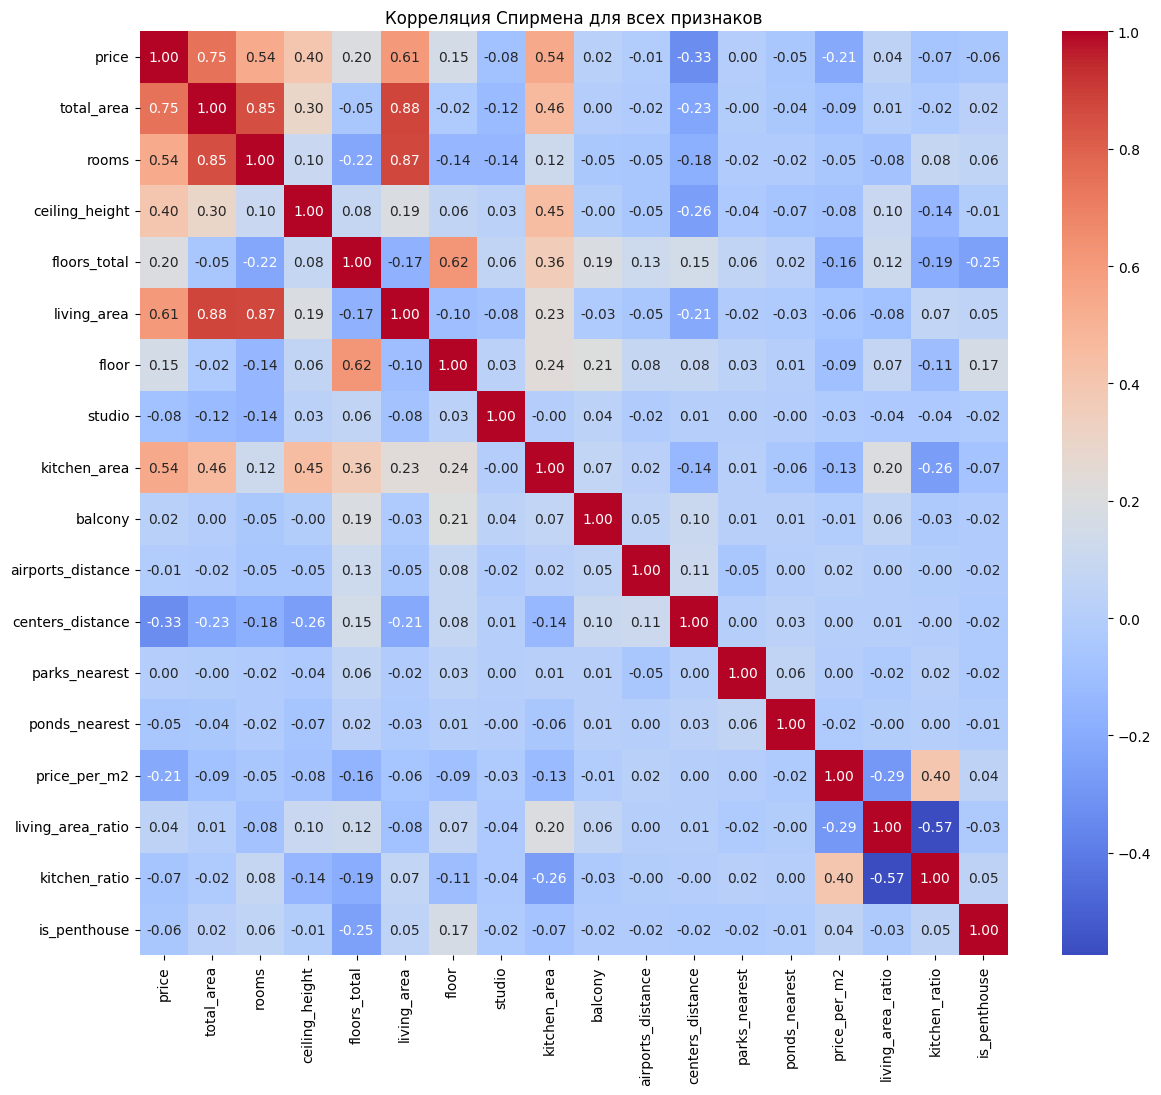

In [ ]:
#оценим вляяние (корреляцию) с помощью коффициента Спирмена

import seaborn as sns
import matplotlib.pyplot as plt

# Корреляция Спирмена по всем признакам
spearman_corr = data.corr(method='spearman')

# Корреляция с price
print("Корреляция Спирмена с price (все признаки):")
print(spearman_corr['price'].sort_values(ascending=False))

# Корреляция с price_per_m2
print("\nКорреляция Спирмена с price_per_m2 (все признаки):")
print(spearman_corr['price_per_m2'].sort_values(ascending=False))

# Тепловая карта
plt.figure(figsize=(14,12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляция Спирмена для всех признаков")
plt.show()

**Отбор значимых фичей**

In [ ]:
# Для предсказания полной цены (price)
significant_features_price = [
    'total_area',       # высокая положительная корреляция (0.747)
    'living_area',      # высокая положительная корреляция (0.606)
    'kitchen_area',     # корреляция 0.540
    'rooms',            # корреляция 0.538
    'ceiling_height',   # корреляция 0.400
    'floor',            # слабая корреляция 0.153
    'floors_total',     # корреляция 0.196
    'centers_distance'  # отрицательная корреляция
]

# Для предсказания цены за квадратный метр (price_per_m2)
significant_features_price_per_m2 = [
    'kitchen_ratio',     # корреляция 0.399
    'living_area_ratio', # корреляция -0.290
    'floors_total',      # корреляция -0.158
    'kitchen_area',      # корреляция -0.125
    'floor',             # корреляция -0.089
    'total_area',        # корреляция -0.088
    'ceiling_height'     # корреляция -0.082
]

# **Выделение различныч группы, внутри которых влияние характеристик на цену различаются между группами**

In [ ]:
from sklearn.cluster import KMeans

# Выбираем признаки для кластеризации
cluster_features = ['total_area', 'living_area_ratio', 'price_per_m2']

# Количество кластеров, возьмем 3 (маленькие, средние, big квартирки)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[cluster_features])

# Посмотрим, сколько квартир в каждом кластере
print(data['cluster'].value_counts())

# Средние значения признаков в каждом кластере
print(data.groupby('cluster')[cluster_features + ['price']].mean())

cluster
0    15291
2     7566
1      677
Name: count, dtype: int64
         total_area  living_area_ratio  price_per_m2     price
cluster                                                       
0         -0.475024          -0.046316      0.090721 -0.227180
1          4.010222           0.006304      0.009727  2.827611
2          0.601199           0.093042     -0.184220  0.206121


# **Построение модели**

**Подбор гиперпараметров с помощью optuna**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.2 MB/s eta 0:00:00


# **XGBoost**

In [ ]:
#будем предсказывать цену с помощью модели XGBoost
X = data[significant_features_price]
y = data['price']

In [ ]:
#сделаем подбор гиперпараметра с помощью optuna
import optuna
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1
    }

    model = xgb.XGBRegressor(**params)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    rmse = -cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)

    return rmse.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Лучшие параметры:", study.best_params)
print(f"Лучший RMSE: {study.best_value:.2f}")

[I 2025-10-01 13:29:44,414] A new study created in memory with name: no-name-d323f7e9-6a23-4544-b0ed-b236ec3d21ad
[I 2025-10-01 13:29:49,382] Trial 0 finished with value: 0.7238993619499923 and parameters: {'n_estimators': 270, 'max_depth': 8, 'learning_rate': 0.14681573573878215, 'subsample': 0.6335453029194134, 'colsample_bytree': 0.9975197655714402, 'reg_alpha': 1.486093878872513, 'reg_lambda': 4.2684318130406265}. Best is trial 0 with value: 0.7238993619499923.
[I 2025-10-01 13:29:50,928] Trial 1 finished with value: 0.6716979161702881 and parameters: {'n_estimators': 188, 'max_depth': 4, 'learning_rate': 0.01127193412193444, 'subsample': 0.7098736211635739, 'colsample_bytree': 0.6832431316332286, 'reg_alpha': 2.2136529819783486, 'reg_lambda': 0.12649328274372207}. Best is trial 1 with value: 0.6716979161702881.
[I 2025-10-01 13:30:01,463] Trial 2 finished with value: 0.6715363857543509 and parameters: {'n_estimators': 772, 'max_depth': 10, 'learning_rate': 0.049084861743645763, 's

Лучшие параметры: {'n_estimators': 603, 'max_depth': 7, 'learning_rate': 0.032275881826340405, 'subsample': 0.6170141113768581, 'colsample_bytree': 0.5191753695720407, 'reg_alpha': 0.16360247197547556, 'reg_lambda': 0.13926306460528498}
Лучший RMSE: 0.64


Средний R² : 0.556 ± 0.099
Средний RMSE: 0.637 ± 0.307
Средний MAE : 0.140 ± 0.011


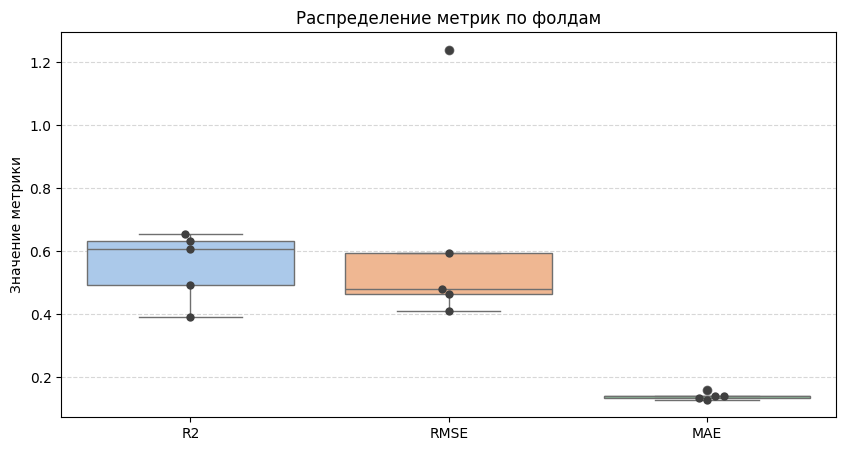

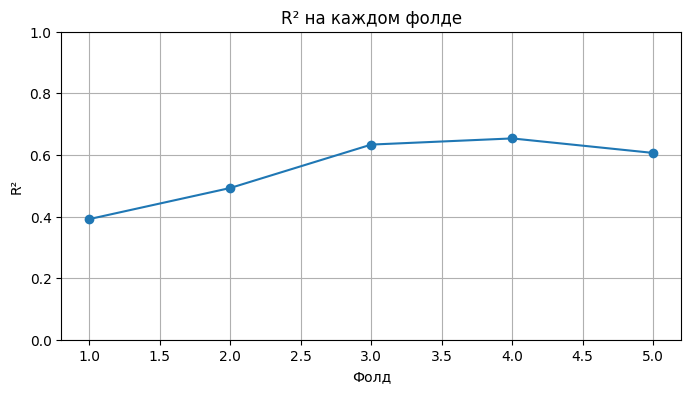

In [ ]:
#обучать будем на 5-ти независимых фолдах чтобы получить метрики, которые независят от конкретного набора данных
from sklearn.model_selection import KFold, cross_val_score

y_array = y.values

best_params = study.best_params
best_params.update({'random_state': 42})

model = xgb.XGBRegressor(**best_params)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model, X, y_array, cv=cv, scoring="r2")
rmse_scores = -cross_val_score(model, X, y_array, cv=cv, scoring="neg_root_mean_squared_error")
mae_scores = -cross_val_score(model, X, y_array, cv=cv, scoring="neg_mean_absolute_error")

print(f"Средний R² : {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Средний RMSE: {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}")
print(f"Средний MAE : {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

# Boxplot распределения метрик
metrics_df = pd.DataFrame({
    "R2":   r2_scores,
    "RMSE": rmse_scores,
    "MAE":  mae_scores
})

plt.figure(figsize=(10, 5))
sns.boxplot(data=metrics_df, palette="pastel")
sns.swarmplot(data=metrics_df, color=".25", size=6)
plt.title("Распределение метрик по фолдам")
plt.ylabel("Значение метрики")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# R² по фолдам
plt.figure(figsize=(8, 4))
plt.plot(range(1, cv.n_splits + 1), r2_scores, marker='o')
plt.title("R² на каждом фолде")
plt.xlabel("Фолд")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.grid()
plt.show()


# **LightGBM**

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score

# Используем те же признаки и целевую переменную
X_lgb = X.copy()
y_array = y.values

def objective_lgb(trial):
    params = {
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1
    }

    model = lgb.LGBMRegressor(**params)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Используем RMSE как метрику
    rmse = -cross_val_score(model, X_lgb, y_array, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    return rmse.mean()

# Создаем исследование Optuna
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=100)  # можно увеличить до 50 или 100 для лучшего подбора

print("Лучшие параметры LightGBM:", study_lgb.best_params)


[I 2025-10-01 13:46:59,546] A new study created in memory with name: no-name-272e040c-a1cb-4837-b999-d8867894acee
[I 2025-10-01 13:47:11,202] Trial 0 finished with value: 0.7036954266918608 and parameters: {'n_estimators': 658, 'learning_rate': 0.14577191284915764, 'num_leaves': 49, 'max_depth': 4, 'subsample': 0.7966519532271656, 'colsample_bytree': 0.589509606310972, 'reg_alpha': 1.1633256933234992, 'reg_lambda': 1.752350779647287}. Best is trial 0 with value: 0.7036954266918608.
[I 2025-10-01 13:47:19,258] Trial 1 finished with value: 0.6417527242438211 and parameters: {'n_estimators': 152, 'learning_rate': 0.016390219829202125, 'num_leaves': 147, 'max_depth': 15, 'subsample': 0.859007557487268, 'colsample_bytree': 0.6977607549560618, 'reg_alpha': 0.7783282676706149, 'reg_lambda': 3.7354873584610866}. Best is trial 1 with value: 0.6417527242438211.
[I 2025-10-01 13:47:37,498] Trial 2 finished with value: 0.677347169164845 and parameters: {'n_estimators': 490, 'learning_rate': 0.0462

Лучшие параметры LightGBM: {'n_estimators': 287, 'learning_rate': 0.01072167954117774, 'num_leaves': 116, 'max_depth': 9, 'subsample': 0.9726449761258028, 'colsample_bytree': 0.6774731693787668, 'reg_alpha': 2.819203382166022, 'reg_lambda': 1.9985631837519202}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 18827, number of used features: 8
[LightGBM] [Info] Start training from score -0.007655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

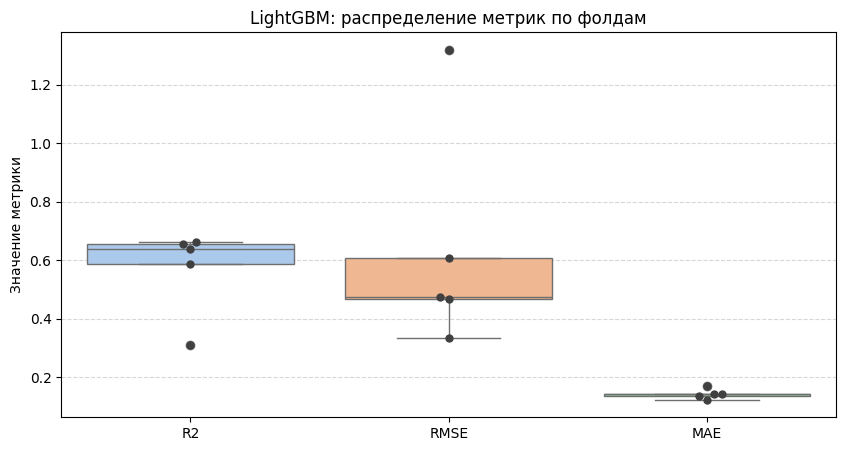

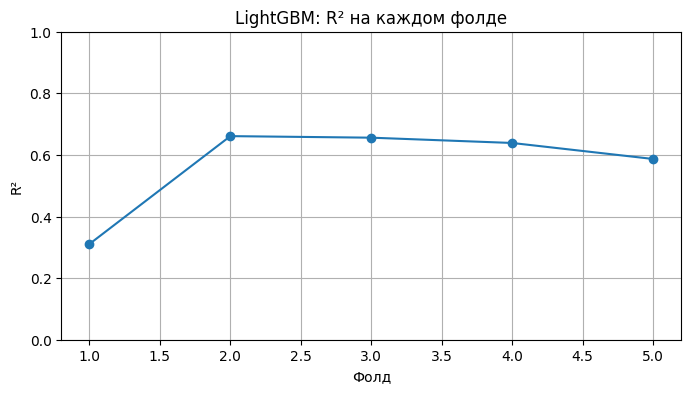

In [ ]:
# Берём лучшие параметры из Optuna
best_params_lgb = study_lgb.best_params
best_params_lgb.update({'objective': 'regression', 'boosting_type': 'gbdt', 'random_state': 42, 'n_jobs': -1})


model_lgb = lgb.LGBMRegressor(**best_params_lgb)


cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model_lgb, X_lgb, y_array, cv=cv, scoring="r2")
rmse_scores = -cross_val_score(model_lgb, X_lgb, y_array, cv=cv, scoring="neg_root_mean_squared_error")
mae_scores = -cross_val_score(model_lgb, X_lgb, y_array, cv=cv, scoring="neg_mean_absolute_error")


print(f"Средний R² : {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Средний RMSE: {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}")
print(f"Средний MAE : {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")


metrics_df = pd.DataFrame({
    "R2": r2_scores,
    "RMSE": rmse_scores,
    "MAE": mae_scores
})

plt.figure(figsize=(10, 5))
sns.boxplot(data=metrics_df, palette="pastel")
sns.swarmplot(data=metrics_df, color=".25", size=6)
plt.title("LightGBM: распределение метрик по фолдам")
plt.ylabel("Значение метрики")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# R² по фолдам
plt.figure(figsize=(8, 4))
plt.plot(range(1, cv.n_splits + 1), r2_scores, marker='o')
plt.title("LightGBM: R² на каждом фолде")
plt.xlabel("Фолд")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.grid()
plt.show()

# **CatBoost**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score

# Используем те же признаки и целевую переменную
X_cb = X.copy()
y_array = y.values

def objective_cb(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'random_seed': 42,
        'verbose': 0
    }

    model = CatBoostRegressor(**params)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Используем RMSE как метрику
    rmse = -cross_val_score(
        model, X_cb, y_array,
        cv=cv, scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    return rmse.mean()

# Создаем исследование Optuna
study_cb = optuna.create_study(direction='minimize')
study_cb.optimize(objective_cb, n_trials=100)  # 100 попыток

print("Лучшие параметры CatBoost:", study_cb.best_params)


[I 2025-10-03 09:59:31,186] A new study created in memory with name: no-name-523ce60d-4ff7-4c2b-a147-c6996ca69522
[I 2025-10-03 10:00:22,833] Trial 0 finished with value: 0.6940477829761089 and parameters: {'iterations': 826, 'depth': 7, 'learning_rate': 0.21712415317718767, 'l2_leaf_reg': 6.267481422217405, 'bagging_temperature': 5.074213390989204}. Best is trial 0 with value: 0.6940477829761089.
[I 2025-10-03 10:00:54,453] Trial 1 finished with value: 0.702926327392612 and parameters: {'iterations': 844, 'depth': 7, 'learning_rate': 0.03906485116282663, 'l2_leaf_reg': 8.874658391043397, 'bagging_temperature': 8.351713797672417}. Best is trial 0 with value: 0.6940477829761089.
[I 2025-10-03 10:01:28,002] Trial 2 finished with value: 0.7065457249600121 and parameters: {'iterations': 594, 'depth': 7, 'learning_rate': 0.03518336379807061, 'l2_leaf_reg': 7.318015015358407, 'bagging_temperature': 3.1242590223356537}. Best is trial 0 with value: 0.6940477829761089.
[I 2025-10-03 10:02:13,14

Лучшие параметры CatBoost: {'iterations': 867, 'depth': 9, 'learning_rate': 0.035013518441018944, 'l2_leaf_reg': 1.0266298912841874, 'bagging_temperature': 8.472994760353505}


Средний R² : 0.564 ± 0.114
Средний RMSE: 0.639 ± 0.332
Средний MAE : 0.136 ± 0.013


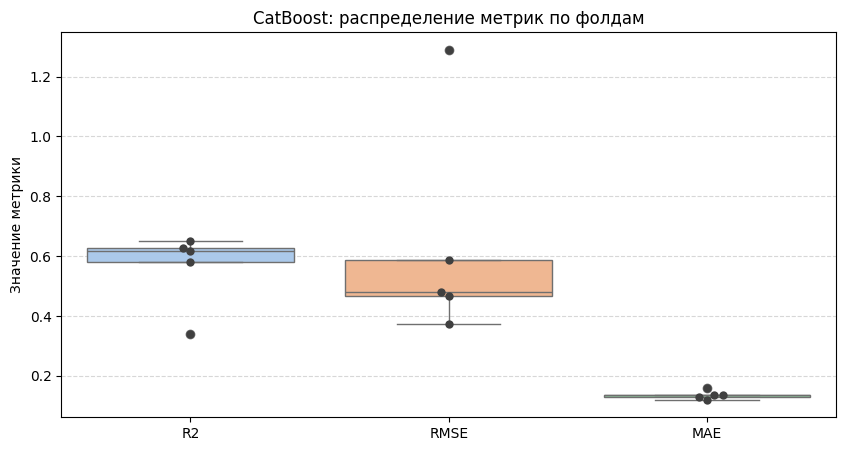

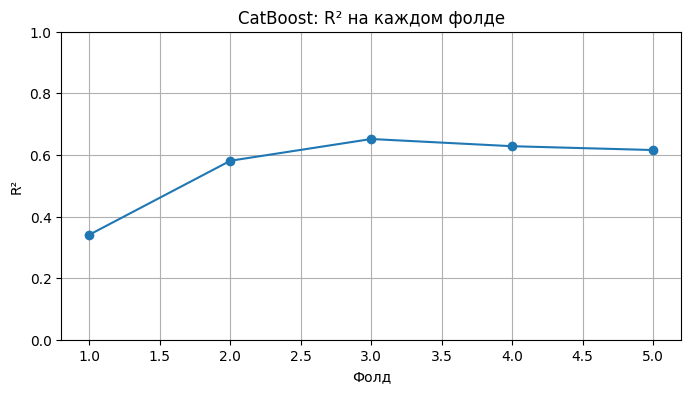

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from catboost import CatBoostRegressor

# Берём лучшие параметры из Optuna
best_params_cb = study_cb.best_params
best_params_cb.update({'random_seed': 42, 'verbose': 0})

# Создаём модель CatBoost с найденными параметрами
model_cb = CatBoostRegressor(**best_params_cb)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Метрики
r2_scores = cross_val_score(model_cb, X_cb, y_array, cv=cv, scoring="r2")
rmse_scores = -cross_val_score(model_cb, X_cb, y_array, cv=cv, scoring="neg_root_mean_squared_error")
mae_scores = -cross_val_score(model_cb, X_cb, y_array, cv=cv, scoring="neg_mean_absolute_error")

print(f"Средний R² : {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"Средний RMSE: {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}")
print(f"Средний MAE : {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

# Таблица метрик
metrics_df = pd.DataFrame({
    "R2": r2_scores,
    "RMSE": rmse_scores,
    "MAE": mae_scores
})

# Боксплот + точки по фолдам
plt.figure(figsize=(10, 5))
sns.boxplot(data=metrics_df, palette="pastel")
sns.swarmplot(data=metrics_df, color=".25", size=6)
plt.title("CatBoost: распределение метрик по фолдам")
plt.ylabel("Значение метрики")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# График R² по фолдам
plt.figure(figsize=(8, 4))
plt.plot(range(1, cv.n_splits + 1), r2_scores, marker='o')
plt.title("CatBoost: R² на каждом фолде")
plt.xlabel("Фолд")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.grid()
plt.show()


# **Вывод**

В ходе выполнения работы была решена задача прогнозирования стоимости квартиры на основе набора характеристик объекта недвижимости.
Работа включала полный цикл анализа данных — от очистки и преобразования признаков до построения и сравнения нескольких моделей машинного обучения.

1. Предобработка данных


1) удалены пропуски и аномальные значения,

2) исправлены логические несоответствия (например, этаж > этажности дома),

3) выполнено кодирование категориальных признаков и масштабирование числовых.

Это позволило получить качественный, сбалансированный датасет для последующего обучения моделей.


2. Генерация новых признаков
Для повышения информативности данных добавлены производные признаки:

1) price_per_m2 — цена за квадратный метр,

2) living_area_ratio — доля жилой площади,

3) kitchen_ratio — доля кухни,

4) is_penthouse — индикатор последнего этажа.

Эти признаки позволили модели лучше улавливать закономерности в структуре цен.

3. Анализ признаков
С помощью корреляции Спирмена выявлены наиболее значимые факторы, влияющие на стоимость квартиры:

1) общая площадь,

2) жилая площадь,

3) площадь кухни,

4) количество комнат,

5) высота потолков,

6) количество этажей,

7) расстояние до центра города.

Площадь и количество комнат показали наиболее сильную положительную корреляцию с ценой, что соответствует реальной рыночной логике.

4. Кластеризация
С помощью алгоритма KMeans были выделены три группы квартир —
компактные, средние и крупные.
Кластеры отличаются как по уровню цен, так и по влиянию признаков на итоговую стоимость.
Это подтверждает, что структура рынка жилья неоднородна и требует адаптивных моделей.

5. Моделирование и сравнение алгоритмов
Были обучены три модели градиентного бустинга: XGBoost, LightGBM и CatBoost.
Для подбора гиперпараметров использовалась библиотека Optuna (по 100 итераций для каждой модели),
а для объективной оценки — 5-fold кросс-валидация.


Результаты моделей:


Модель	Средний R²	RMSE	MAE

XGBoost	0.56	0.64	0.14

LightGBM	0.57	0.64	0.142

CatBoost	0.564	0.639	0.136


Таким образом, LightGBM показал немного лучшее качество по R²,
а CatBoost — наименьшую абсолютную ошибку (MAE),
что говорит о его более стабильной работе на разнородных данных.
XGBoost немного уступил по всем метрикам, но также продемонстрировал приемлемое качество.

6. Итоговые выводы

Все три модели показали схожий уровень точности (R² ≈ 0.56–0.57), что говорит о корректной структуре данных и адекватном выборе признаков.

Добавление новых признаков и предварительная обработка данных заметно улучшили качество предсказания.

Модель LightGBM можно считать оптимальным выбором для дальнейшего использования — она сочетает точность, скорость обучения и интерпретируемость.